# **Task 1.1 – Data preparation**

#### *In this section I have...*
--- 
<u>**Loaded the Glass Dataset**</u>
- loaded the dataset as a **dataframe** using pandas
- printed the first **5 columns** to check successful loading
- printed the **shape** of the dataset to further verify nothing went wrong
<br><br>

<u>**Checked for Dupicates and Missing Values**</u>
- printed the sum of **duplicates found**, and the rows identified 
- **dropped the duplicates**
- printed the **sum of missing values**, none were found - no further action taken
<br><br>

<u>**Normalised the Dataset**</u>
- **separated the targets** from the inputs - targets are numerical but we don't scale them, they would lose their meaning
- used **MinMaxScaler** to scale the dataset for all values to lie between 0-1
- plotted two columns before and after normalisation to ensure the **original shape was maintained**
  - this ensures the input values stayed *relative to their original values*, but now within a smaller range
<br><br>
---
#### <u>**Notes**:</u>
**Addressing duplicates** in a dataset this size duplicates are *unlikely* to impact the quality of the models significantly - BUT it is good practice so I decided to explore this regardless. 

**Normalisation**, scaling the input values between 0-1, is a crucial step as both kNN and SVM are **distanced based** models. Without scaling, features with large values can overpower the distance based calculations the models make to in order to classify.<br></br>
This leads to features being treated as *more <u>**OR**</u> less important* when classifying points - purely based on distance.<br></br>
Without scaling, the classifcations made in training *<u>**AND**</u>* the predictions made in testing are impacted - skewing results and influencing how the models behave and interpret the data.

---

In [157]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#### **Loading the Dataset**

In [160]:
data = pd.read_csv("glass_dataset.csv") 
print(data.head(5), "\n") #print first 5 rows
print(data.shape) #check out the shape (columns) 

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1 

(214, 10)


#### **Checking for Duplicates and Missing Values**

In [163]:
print("Duplicate count : ",data.duplicated().sum(), "\n") #print number of duplicates
print("Duplicate rows: \n", data[data.duplicated(keep=False)], "\n") #print present duplicate rows
data = data.drop_duplicates() #drop duplicates from our set
print("Duplicate count after drop : ",data.duplicated().sum(), "\n") #print number of duplicates again to verify drop

print("Missing count: ",data.isnull().sum().sum(), "\n") #calculate and print total sum of missing values

Duplicate count :  1 

Duplicate rows: 
          RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
38  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1 

Duplicate count after drop :  0 

Missing count:  0 



#### **Normalising the Dataset, Verifying the Correctness**

In [166]:
#separate the inputs (glass features) from the targets (glass types) 
inputs = data.drop(columns=["Type"]) 
targets = data["Type"]  

inputs_before = inputs.copy()

#normalise inputs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)
data = pd.DataFrame(scaled, columns=inputs.columns)
data["Type"] = targets.reset_index(drop=True) #reattach the target to the scaled dataset 

#reassign inputs and targets after normalisation for later use
inputs = data.drop(columns=["Type"])
targets = data["Type"]

print("After scaling \n", data.max() - data.min()) #print the range after scaling 

After scaling 
 RI      1.0
Na      1.0
Mg      1.0
Al      1.0
Si      1.0
K       1.0
Ca      1.0
Ba      1.0
Fe      1.0
Type    6.0
dtype: float64


#### **Verifying Normalisation Correctness**

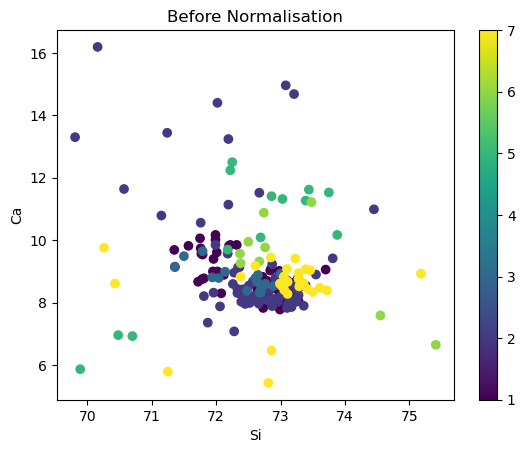

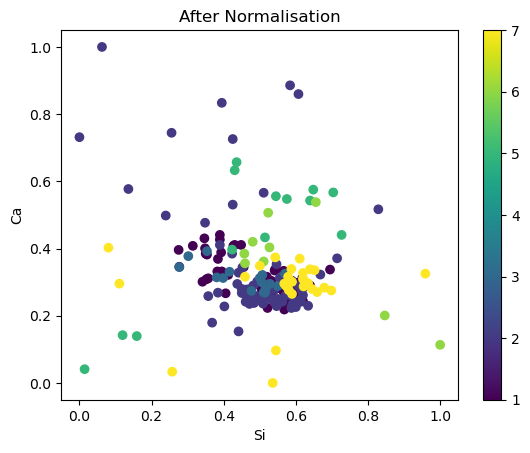

In [171]:
#function to plot two columns(inputs) before and after scaling
def plot_scale_effects(dataset, input_1, input_2, targets, title):
    plt.scatter(dataset[input_1], dataset[input_2], c=targets, cmap="viridis")
    plt.colorbar()
    plt.title(title)
    plt.xlabel(input_1)
    plt.ylabel(input_2)
    plt.show()

plot_features(inputs_before, "Si", "Ca", targets, "Before Normalisation")
plot_features(data, "Si", "Ca", targets, "After Normalisation")


# **Task 1.2 – Classification**
--- 
<u>*In this section I have:*</u>

# **Task 1.3 – Assessment of Classification**
--- 
<u>*In this section I have:*</u>